In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
test=pd.read_csv("testing_set.csv")
train=pd.read_csv("training_set.csv")

In [3]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               599 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            613 non-null object
Self_Employed        582 non-null object
ApplicantIncome      612 non-null float64
CoapplicantIncome    613 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [7]:
cat=[]
con=[]
for i in test.columns:
    if(train[i].dtypes)=="object":
        cat.append(i)
    else:
        con.append(i)


In [8]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [9]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [11]:
from scipy.stats import mode

In [12]:
train['Gender'].fillna(mode(list(train['Gender'])).mode[0], inplace=True)
train['Married'].fillna(mode(list(train['Married'])).mode[0], inplace=True)
train['Self_Employed'].fillna(mode(list(train['Self_Employed'])).mode[0], inplace=True)

# #imputing mean for the missing value
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
mapping={'0':0,'1':1,'2':2,'3+':3}
train = train.replace({'Dependents':mapping})
train['Dependents'].fillna(train['Dependents'].mean(), inplace=True)
train['Loan_Amount_Term'].fillna(method='ffill',inplace=True)
train['Credit_History'].fillna(method='ffill',inplace=True)
train['ApplicantIncome'].fillna(method='ffill',inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null float64
Education            613 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null float64
CoapplicantIncome    613 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(6), object(7)
memory usage: 62.5+ KB


## Data visualised

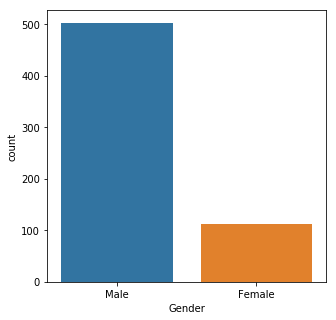

In [14]:
plt.figure(figsize=(5,5))
sb.countplot(train.Gender)

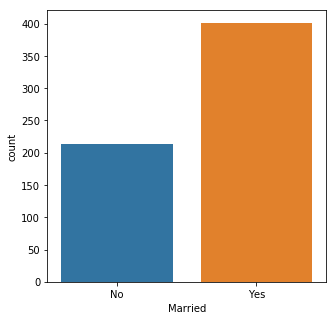

In [15]:
plt.figure(figsize=(5,5))
sb.countplot(train. Married)

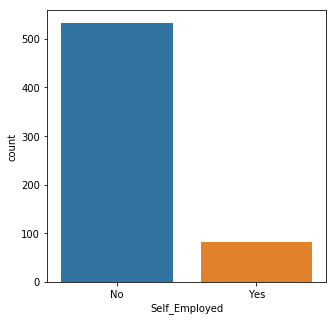

In [16]:
plt.figure(figsize=(5,5))
sb.countplot(train.Self_Employed)

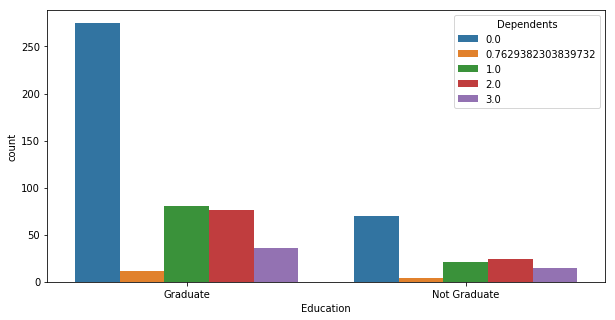

In [17]:
plt.figure(figsize=(10,5))
sb.countplot(train.Education,hue=train.Dependents)

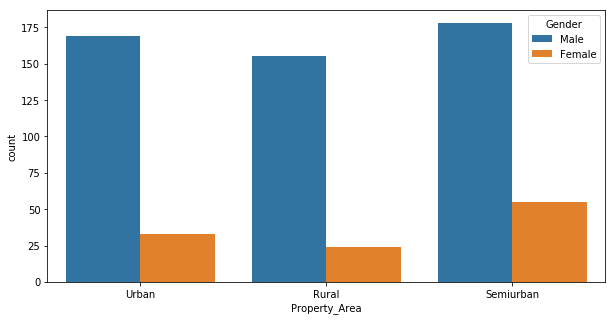

In [18]:
plt.figure(figsize=(10,5))
sb.countplot(train.Property_Area, hue=train.Gender )

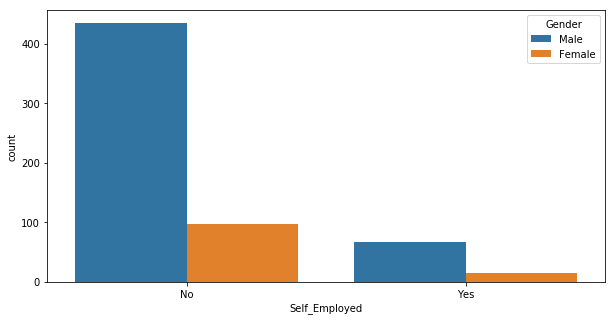

In [19]:
plt.figure(figsize=(10,5))
sb.countplot(train.Self_Employed, hue=train.Gender )

In [20]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,5849.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [21]:
train.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.119138,0.027054,0.160767,-0.097558,-0.055942
ApplicantIncome,0.119138,1.000000,-0.116000,0.565595,-0.043012,-0.020458
CoapplicantIncome,0.027054,-0.116000,1.000000,0.187914,-0.067375,0.009338
LoanAmount,0.160767,0.565595,0.187914,1.000000,0.039488,-0.018836
Loan_Amount_Term,-0.097558,-0.043012,-0.067375,0.039488,1.000000,-0.031843
Credit_History,-0.055942,-0.020458,0.009338,-0.018836,-0.031843,1.000000


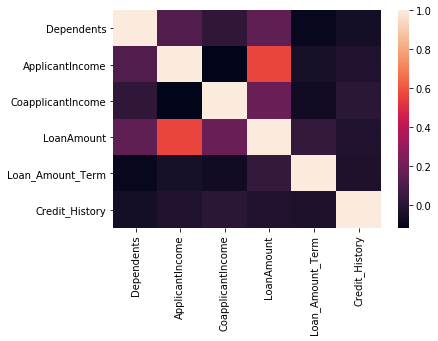

In [22]:
sb.heatmap(train.corr())

In [23]:
train.dropna( inplace=True)

In [24]:
#converting the cateogorical data to numbers using the label encoder
x1 = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in x1:
    le.fit(list(train[i].values))
    train[i] = le.transform(list(train[i]))

In [25]:
x1=train[['Property_Area','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']]

In [26]:
x1.head()

,Property_Area,LoanAmount,Loan_Amount_Term,Credit_History,Dependents
0,2,146.412162,360.0,1.0,0.0
1,0,128.000000,360.0,1.0,1.0
2,2,66.000000,360.0,1.0,0.0
3,2,120.000000,360.0,1.0,0.0
4,2,141.000000,360.0,1.0,0.0


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
c=pd.DataFrame(sc.fit_transform(x1),columns=['Property_Area','LoanAmount','Loan_Amount_Term','Credit_History','Dependents'])

In [28]:
x=x1
y=train['Loan_Status']

#Getting Test and Training Set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=10,max_leaf_nodes=5)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print("accuracy is %f"%(accuracy_score(ytest,pred)))

accuracy is 0.821138


In [30]:
ytest

83     0
220    0
57     0
602    1
266    1
      ..
532    0
531    1
120    1
81     1
25     1
Name: Loan_Status, Length: 123, dtype: int64

In [31]:
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [32]:
model.predict(xtest)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [33]:
import pickle as pkl

In [34]:
pkl.dump(rfc, open('model.pkl', 'wb'))